# EDA
I've split the EDA into 3 separate parts:
- Understanding the dataset
- Cleaning the dataset
- Feature analysis
    - Univariate
    - Multivariate

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv(r'C:\Users\marku\Desktop\ML\MLGit\datasets\Star.csv')

# Understanding the dataset

In [30]:
df.shape

(240, 7)

The dataset has 240 rows and 7 columns

In [31]:
df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

Name of each column

In [32]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


Indicates which datatype each column has
- int64/float64: normal numeric value

In [34]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


.describe() gives us information about how many values each column contains, the mean, standard deviation, and different percentiles. .describe() can only handle numeric values.
Doesn't seem to be any null values
I cannot see any strange values.

In [35]:
df['Star color'].nunique()

19

Number of unique star colors.

# Dataset Dictionary
- Temperature (K): Temperature measured in Kelvin
- Luminosity (L/LO): The actual brightness of a star
- Radius (R/RO): Radius of the star
- Absolute magnitude: How bright a star would be, if measured from a standard distance
- Star Color: Which color does the star emit
- Spectral class: Which spectral class does the star belong to?
    - O, B, A, F, G, K, M
- Star type: The ground truth:
    - Red Dwarf
    - Brown Dwarf
    - White Dwarf
    - Main Sequence
    - Super Giants
    - Hyper Giants

# Cleaning the dataset

## Null-values

In [36]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

# Feature analysis

## Univariate Analysis

Text(0.5, 1.0, 'Absolute magnitude')

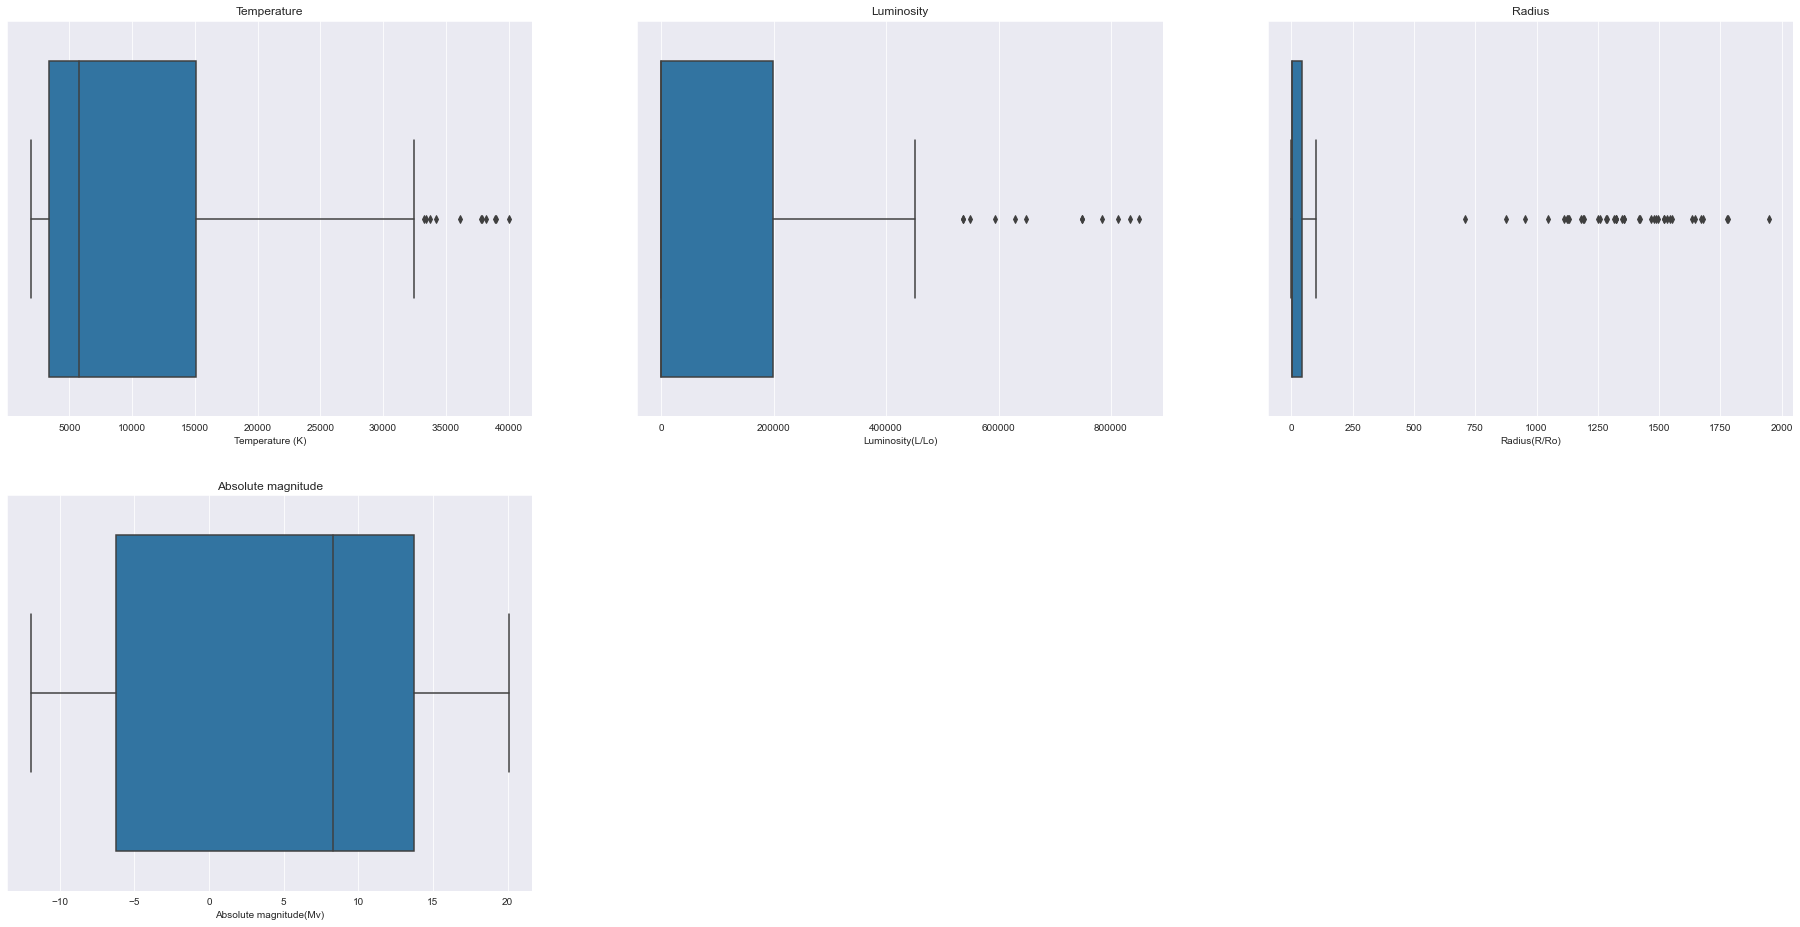

In [37]:
fig = plt.figure(figsize=(32,16))
gs = fig.add_gridspec(2,3)
plot1 = fig.add_subplot(gs[0,0])
plot2 = fig.add_subplot(gs[0,1])
plot3 = fig.add_subplot(gs[0,2])
plot4 = fig.add_subplot(gs[1,0])

sns.boxplot(ax=plot1,x=df['Temperature (K)'])
plot1.set_title('Temperature')

sns.boxplot(ax=plot2,x=df['Luminosity(L/Lo)'])
plot2.set_title('Luminosity')

sns.boxplot(ax=plot3,x=df['Radius(R/Ro)'])
plot3.set_title('Radius')

sns.boxplot(ax=plot4,x=df['Absolute magnitude(Mv)'])
plot4.set_title('Absolute magnitude')

Major outliers on all features except Absolute magnitude. Especially big outliers on Radius. Making it look like it will be a good idea to normalize the features before training a model

Text(0.5, 1.0, 'Star type')

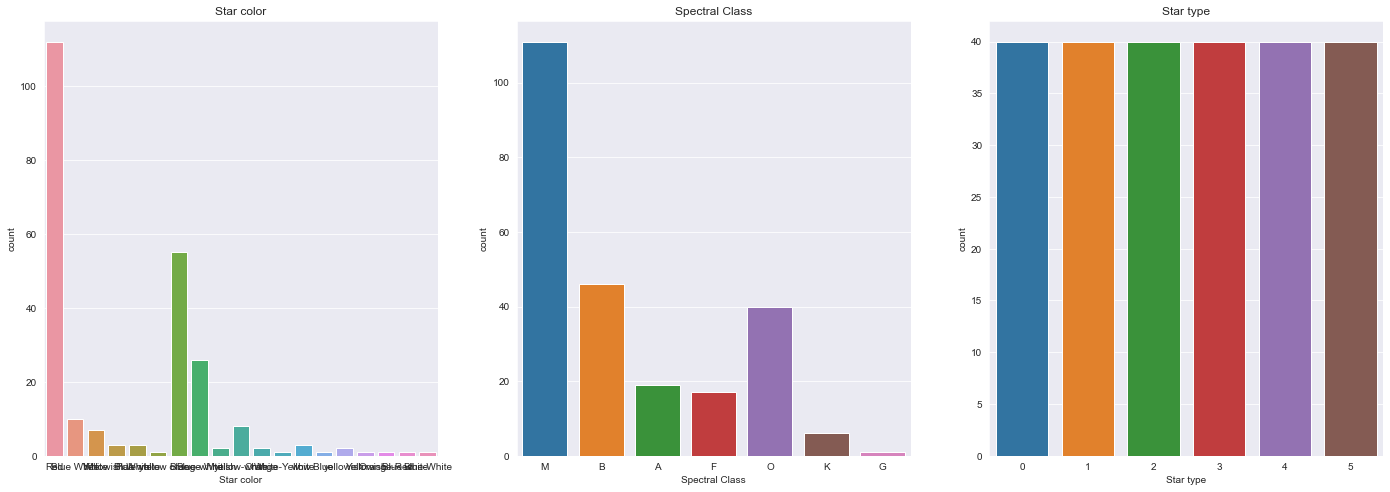

In [38]:
fig = plt.figure(figsize=(24,8))
gs = fig.add_gridspec(1,3)
plot1 = fig.add_subplot(gs[0,0])
plot2 = fig.add_subplot(gs[0,1])
plot3 = fig.add_subplot(gs[0,2])

sns.countplot(ax=plot1,x=df['Star color'])
plot1.set_title('Star color')

sns.countplot(ax=plot2,x=df['Spectral Class'])
plot2.set_title('Spectral Class')

sns.countplot(ax=plot3,x=df['Star type'])
plot3.set_title('Star type')

The ground truth Star type is perfectly balanced, which makes for better training and testing when that time comes.
The other two categorical values are poorly balanced which might lead to problems

## Multivariate Analysis

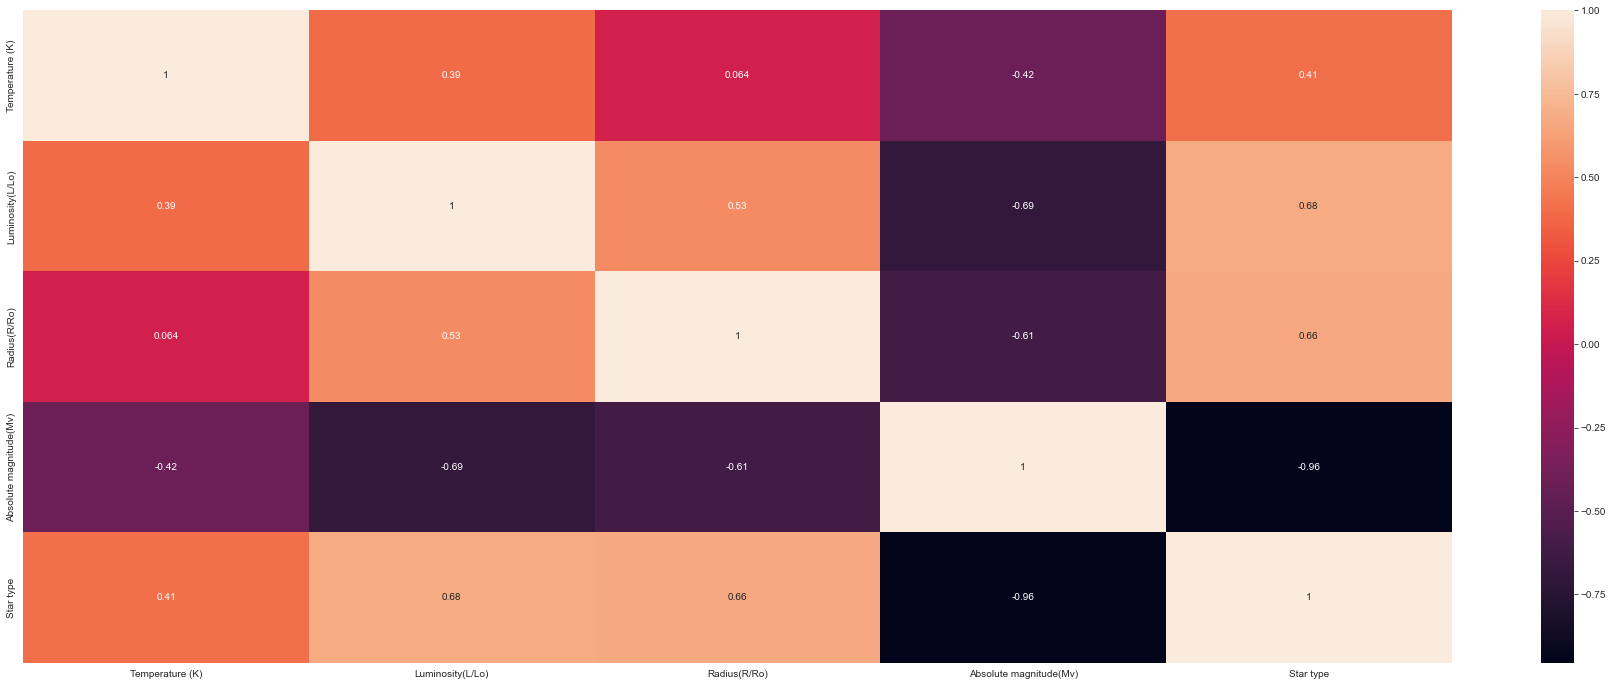

In [39]:
corr = df.corr()
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(corr, annot=True)

(I could have one-hot encoded Star color and Spectral class to make them a part of the heatmap, but chose to leave them out due to how low the readability the heatmap would have gotten)
Here we can a strong correlation between Star type and: Temperature, Luminosity and Radius.
However, the absolute magnitude has an incredibly high negative correlation. This means as the Star type increases, the Absolute magnitude decreases a lot. Meaning that higher star type emit less light at the given distance.

<Figure size 3456x2304 with 0 Axes>

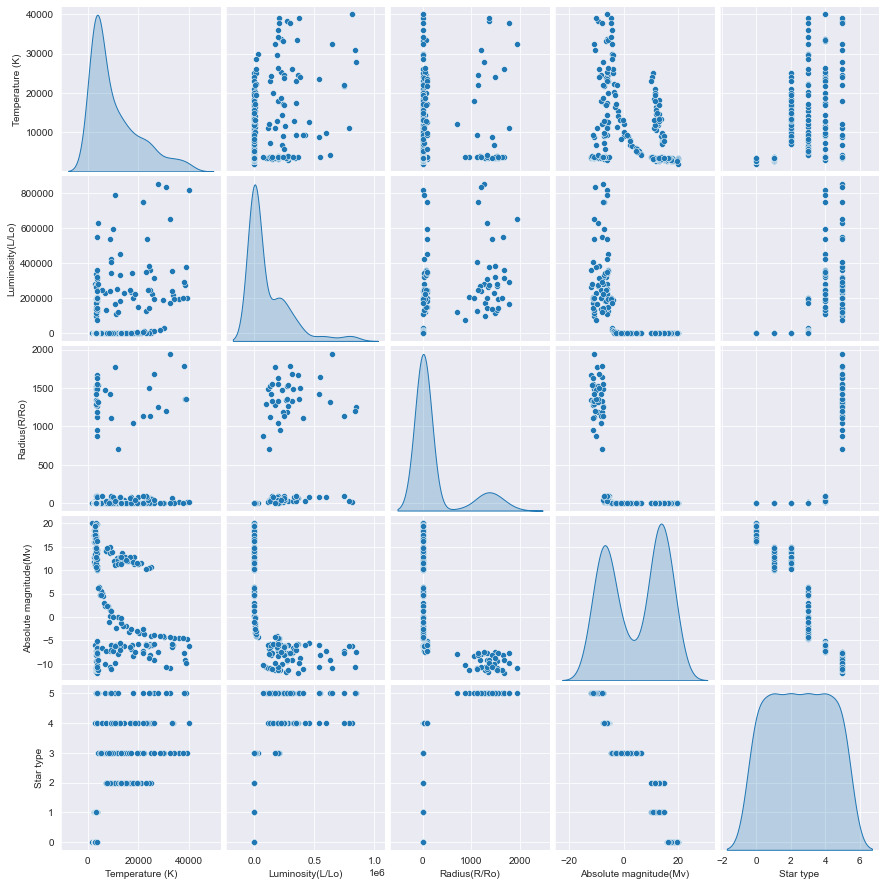

In [40]:
fig = plt.figure(figsize=(48,32))
sns.pairplot(df, diag_kind="kde")

Just another visualisation of a correlation heatmap, but also showing distribtuion of each variable